# Clase #3: Exploratory Data Analysis

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Creación de un DataFrame de ejemplo

In [87]:
data = {
    'Alumno': ['Ana', 'Luis', 'Pedro', 'Maria', 'Jorge', 'Sofia', 'Carlos', 'Lucia', 'Miguel', 'Fernanda'],
    'Edad': [20, 22, 21, 23, 22, 21, 20, 23, 22, 21],
    'Genero': ['F', 'M', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'Carrera': ['Ing. Sistemas', 'Derecho', 'Medicina', 'Arquitectura', 'Derecho', 'Ing. Sistemas', 'Medicina', 'Arquitectura', 'Ing. Sistemas', 'Derecho'],
    'Calificacion_Matematicas': [90, 70, 85, 95, 65, 88, 92, 75, 85, 80],
    'Calificacion_Lenguaje': [85, 75, 80, 90, 70, 82, 88, 78, 84, 77],
    'Horas_Estudio': [15, 10, 12, 14, 8, 13, 16, 9, 11, 10]
}

df = pd.DataFrame(data)

df.head()

,Alumno,Edad,Genero,Carrera,Calificacion_Matematicas,Calificacion_Lenguaje,Horas_Estudio
0,Ana,20,F,Ing. Sistemas,90,85,15
1,Luis,22,M,Derecho,70,75,10
2,Pedro,21,M,Medicina,85,80,12
3,Maria,23,F,Arquitectura,95,90,14
4,Jorge,22,M,Derecho,65,70,8


In [88]:
# Agregar una nueva observación con loc
df.loc[0] = ['Pablo', 24, 'M', 'Economía', 100, 75, 0]

## 2. Cortes usando operadores lógicos

In [89]:
# Alumnos con calificaciones mayores a 85 en matemáticas
alumnos_buenas_notas_mate = df[df['Calificacion_Matematicas'] > 85]
alumnos_buenas_notas_mate

,Alumno,Edad,Genero,Carrera,Calificacion_Matematicas,Calificacion_Lenguaje,Horas_Estudio
0,Pablo,24,M,Economía,100,75,0
3,Maria,23,F,Arquitectura,95,90,14
5,Sofia,21,F,Ing. Sistemas,88,82,13
6,Carlos,20,M,Medicina,92,88,16


In [90]:
# Alumnos que no son de Derecho
alumnos_no_derecho = df[df['Carrera'] != 'Derecho']
alumnos_no_derecho

,Alumno,Edad,Genero,Carrera,Calificacion_Matematicas,Calificacion_Lenguaje,Horas_Estudio
0,Pablo,24,M,Economía,100,75,0
2,Pedro,21,M,Medicina,85,80,12
3,Maria,23,F,Arquitectura,95,90,14
5,Sofia,21,F,Ing. Sistemas,88,82,13
6,Carlos,20,M,Medicina,92,88,16
7,Lucia,23,F,Arquitectura,75,78,9
8,Miguel,22,M,Ing. Sistemas,85,84,11


In [91]:
# Alumnos con más de 20 años y calificación en lenguaje menor a 80
alumnos_mayores_y_bajas_notas_lenguaje = df[(df['Edad'] > 20) & (df['Calificacion_Lenguaje'] < 80)]
alumnos_mayores_y_bajas_notas_lenguaje

,Alumno,Edad,Genero,Carrera,Calificacion_Matematicas,Calificacion_Lenguaje,Horas_Estudio
0,Pablo,24,M,Economía,100,75,0
1,Luis,22,M,Derecho,70,75,10
4,Jorge,22,M,Derecho,65,70,8
7,Lucia,23,F,Arquitectura,75,78,9
9,Fernanda,21,F,Derecho,80,77,10


In [92]:
# Cambiar la calificación en Matemáticas de 'Ana' a 95
df.loc[df['Alumno'] == 'Pablo', 'Calificacion_Matematicas'] = 95
df[df['Alumno'] == 'Pablo']

,Alumno,Edad,Genero,Carrera,Calificacion_Matematicas,Calificacion_Lenguaje,Horas_Estudio
0,Pablo,24,M,Economía,95,75,0


In [93]:
# Seleccionar la columna 'Calificacion_Matematicas' para las filas 2 a 4
calificaciones_mate = df.iloc[2:5, df.columns.get_loc('Calificacion_Matematicas')]
calificaciones_mate

,Calificacion_Matematicas
2,85
3,95
4,65


## 3. Cortes usando "isin"

In [94]:
# Alumnos de Ing. Sistemas o Medicina
alumnos_carreras_seleccionadas = df[df['Carrera'].isin(['Ing. Sistemas', 'Medicina'])]
alumnos_carreras_seleccionadas

,Alumno,Edad,Genero,Carrera,Calificacion_Matematicas,Calificacion_Lenguaje,Horas_Estudio
2,Pedro,21,M,Medicina,85,80,12
5,Sofia,21,F,Ing. Sistemas,88,82,13
6,Carlos,20,M,Medicina,92,88,16
8,Miguel,22,M,Ing. Sistemas,85,84,11


## 4. Creación de funciones

In [95]:
# Función para categorizar calificación en matemáticas
def categorizar_calificacion_matematicas(calificacion):
    if calificacion >= 90:
        return 'Excelente'
    elif calificacion >= 80:
        return 'Bueno'
    else:
        return 'Regular'

In [96]:
df['Categoria_Matematicas'] = df['Calificacion_Matematicas'].apply(categorizar_calificacion_matematicas)
df.head()

,Alumno,Edad,Genero,Carrera,Calificacion_Matematicas,Calificacion_Lenguaje,Horas_Estudio,Categoria_Matematicas
0,Pablo,24,M,Economía,95,75,0,Excelente
1,Luis,22,M,Derecho,70,75,10,Regular
2,Pedro,21,M,Medicina,85,80,12,Bueno
3,Maria,23,F,Arquitectura,95,90,14,Excelente
4,Jorge,22,M,Derecho,65,70,8,Regular


## 5. Creación de variables booleanas

In [97]:
# Variable para indicar si un alumno estudia más de 12 horas
df['Estudia_Mucho'] = df['Horas_Estudio'] > 12
df.head()

,Alumno,Edad,Genero,Carrera,Calificacion_Matematicas,Calificacion_Lenguaje,Horas_Estudio,Categoria_Matematicas,Estudia_Mucho
0,Pablo,24,M,Economía,95,75,0,Excelente,False
1,Luis,22,M,Derecho,70,75,10,Regular,False
2,Pedro,21,M,Medicina,85,80,12,Bueno,False
3,Maria,23,F,Arquitectura,95,90,14,Excelente,True
4,Jorge,22,M,Derecho,65,70,8,Regular,False


## 6. Tablas pivoteadas

In [98]:
# Promedio de calificaciones por carrera y género
tabla_pivote = df.pivot_table(values=['Calificacion_Matematicas', 'Calificacion_Lenguaje'],
                              index='Carrera',
                              columns='Genero',
                              aggfunc='mean')

tabla_pivote

Calificacion_Lenguaje       Calificacion_Matematicas      
Genero                            F     M                        F     M
Carrera                                                                 
Arquitectura                   84.0   NaN                     85.0   NaN
Derecho                        77.0  72.5                     80.0  67.5
Economía                        NaN  75.0                      NaN  95.0
Ing. Sistemas                  82.0  84.0                     88.0  85.0
Medicina                        NaN  84.0                      NaN  88.5

## 7. Funciones agregadas

In [99]:
# Promedio de calificaciones por carrera
promedio_calificaciones_por_carrera = df.groupby('Carrera')[['Calificacion_Matematicas', 'Calificacion_Lenguaje']].mean()
promedio_calificaciones_por_carrera

,Calificacion_Matematicas,Calificacion_Lenguaje
Carrera,,
Arquitectura,85.000000,84.0
Derecho,71.666667,74.0
Economía,95.000000,75.0
Ing. Sistemas,86.500000,83.0
Medicina,88.500000,84.0


## 8. Feature Engineering

In [100]:
# Creación de una nueva variable que combina matemáticas y lenguaje
df['Promedio_Total'] = df[['Calificacion_Matematicas', 'Calificacion_Lenguaje']].mean(axis=1)
df.head()

,Alumno,Edad,Genero,Carrera,Calificacion_Matematicas,Calificacion_Lenguaje,Horas_Estudio,Categoria_Matematicas,Estudia_Mucho,Promedio_Total
0,Pablo,24,M,Economía,95,75,0,Excelente,False,85.0
1,Luis,22,M,Derecho,70,75,10,Regular,False,72.5
2,Pedro,21,M,Medicina,85,80,12,Bueno,False,82.5
3,Maria,23,F,Arquitectura,95,90,14,Excelente,True,92.5
4,Jorge,22,M,Derecho,65,70,8,Regular,False,67.5


## 9. Visualización de datos

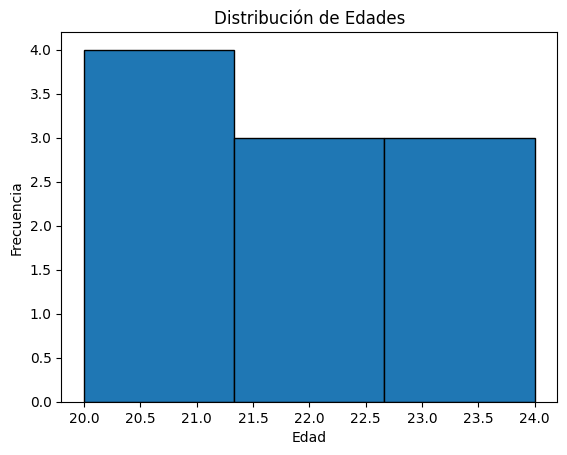

In [101]:
# Histograma de edades
plt.hist(df['Edad'], bins=3, edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

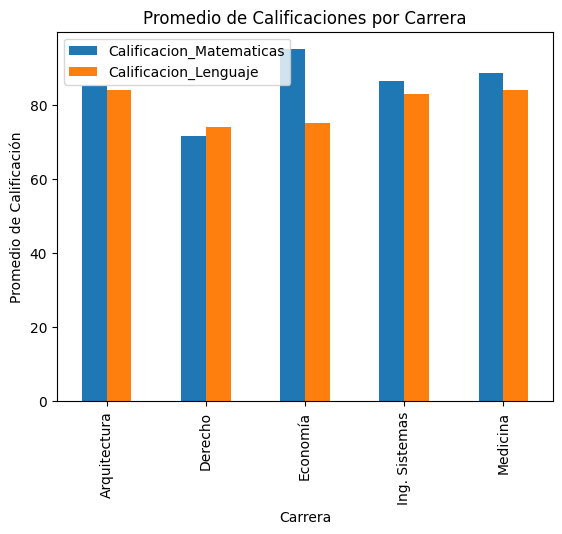

In [102]:
# Gráfico de barras de promedio de calificaciones por carrera
promedio_calificaciones_por_carrera.plot(kind='bar')
plt.title('Promedio de Calificaciones por Carrera')
plt.ylabel('Promedio de Calificación')
plt.show()

## 10. Exploración avanzada con pandas

In [103]:
df.head(1)

,Alumno,Edad,Genero,Carrera,Calificacion_Matematicas,Calificacion_Lenguaje,Horas_Estudio,Categoria_Matematicas,Estudia_Mucho,Promedio_Total
0,Pablo,24,M,Economía,95,75,0,Excelente,False,85.0


In [104]:
# Identificación de outliers en horas de estudio usando el z-score
from scipy.stats import zscore

df['Z_Score_Horas_Estudio'] = zscore(df['Horas_Estudio'])
outliers_horas_estudio = df[df['Z_Score_Horas_Estudio'].abs() > 2]
outliers_horas_estudio

,Alumno,Edad,Genero,Carrera,Calificacion_Matematicas,Calificacion_Lenguaje,Horas_Estudio,Categoria_Matematicas,Estudia_Mucho,Promedio_Total,Z_Score_Horas_Estudio
0,Pablo,24,M,Economía,95,75,0,Excelente,False,85.0,-2.497383


In [105]:
# Cálculo de la correlación entre horas de estudio y calificaciones
correlacion_horas_calificaciones = df[['Horas_Estudio', 'Calificacion_Matematicas', 'Calificacion_Lenguaje']].corr()
correlacion_horas_calificaciones

,Horas_Estudio,Calificacion_Matematicas,Calificacion_Lenguaje
Horas_Estudio,1.000000,0.115827,0.701068
Calificacion_Matematicas,0.115827,1.000000,0.724785
Calificacion_Lenguaje,0.701068,0.724785,1.000000


## 11. Uso de pandasql para consultas tipo SQL en el DataFrame

In [106]:
!pip install pandasql

In [107]:
import pandasql as psql
query = "SELECT Alumno, Calificacion_Matematicas, Calificacion_Lenguaje FROM df WHERE Edad > 21"
result = psql.sqldf(query, locals())
result

,Alumno,Calificacion_Matematicas,Calificacion_Lenguaje
0,Pablo,95,75
1,Luis,70,75
2,Maria,95,90
3,Jorge,65,70
4,Lucia,75,78
5,Miguel,85,84
